## Homework Solution - Regression

Team :
<br>1.Bagus Pamuncak Negoro
<br>2.Dini Nur Afriani
<br>3.Elisa Fitri
<br>4.Pinandito Wahyu Pratomo
<br>5.Vanny Elsyavitriani Bowo

# Exploratory Data Analysis
Tuliskan hasil simple-EDA yang dilakukan disini

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.4
seaborn version :  0.11.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Data

In [3]:
df = pd.read_excel('youtube_statistics.xlsx')

In [4]:
df_2=df.copy()

In [5]:
pd.set_option('display.max_columns', None)
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
8920,2018-01-01,अव्यक्त बापदादा LIVE - 31/12/2017 (5.00PM to 9...,Madhuban Murli Brahma Kumaris,27,17:08:03,"Daily Murli|""Brahma Kumaris""|""Madhuban""|""Omsha...",63226,1517,84,35,False,False,False,Murli classes are held daily at all centers at...,8,386,56,2017-12-31
4465,2017-12-07,Learning Mixology ft. Kara Anderson | #ICanDoT...,Kanan Gill,23,09:08:54,"Kanan Gill|""i can do that""|""mixology""|""kara an...",82920,2561,90,194,False,False,False,Episode 4 of I Can Do That! In this I learn th...,6,3426,54,2017-12-04
9835,2018-01-06,Ghazal srinivas case | singer ghazal srinivas ...,Free Ticket,24,04:21:43,Ghazal srinivas case | singer ghazal srinivas ...,1271852,1250,678,106,False,False,False,►PLEASE SUBSCRIBE :\n https://www.youtube.com/...,18,806,88,2018-01-03
2050,2017-11-24,"To Be Competitive, Build Your Competence",Sadhguru,26,09:09:37,"Sadhguru (Person)|""sadguru""|""satguru""|""Sadhgur...",34225,1528,11,64,False,False,False,Is competition in education a bad thing? Sadhg...,20,1032,40,2017-11-22
7529,2017-12-24,Swathi Chinukulu | 22nd December 2017 | Full ...,etvteluguindia,24,16:32:13,"etv daily serials|""etv daily soaps""|""etv ficti...",185025,422,136,66,False,False,False,☛ For latest updates on ETV Channels | http://...,24,578,73,2017-12-22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Glossary Column description:
<br>● trending_date: tanggal ketika video trending
<br>● title: judul video
<br>● channel_title: nama channel
<br>● category_id: kategori video dalam label encoding
<br>● publish_time: waktu publish video
<br>● tags: tag yang digunakan pada video
<br>● views: jumlah views video
<br>● likes: jumlah likes video
<br>● dislikes: jumlah dislikes video
<br>● comment_count: jumlah komentar pada video
<br>● comments_disabled: apakah status komentar dinonaktifkan pada video
<br>● ratings_disabled: apakah rating dinonaktifkan pada video
<br>● video_error_or_removed: apakah video error atau sudah dihapus saat ini
<br>● description: deskripsi video
<br>● No_tags: jumlah tags yang digunakan
<br>● desc_len: panjang kata deskripsi video
<br>● len_title: panjang kata judul video
<br>● publish_date: tanggal publish video

<b>Kesimpulan</b>:
<br>● Terdapat 17 feature dan 1 target pada dataset dengan 4 tipe data yang berbeda pada youtube_statistics, yaitu object, int64, bool dan datetime64[ns]
<br>● Jumlah baris data keseluruhan sebanyak 36791, namun jika diperhatikan kolom description memiliki jumlah baris data yang berbeda dengan lainnya yaitu sebanyak 36746 baris. Maka dari itu dapat dipastikan bahwa feature description memiliki nilai null. 

In [7]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

<b>Kesimpulan</b>:
<br>● Setelah dilakukan pengecekan, 45 row data pada feature description bernilai null

In [8]:
#Mengecek jumlah jenis data unik
for i in df.columns:
    print(i,"column's total unique values are:",df[i].nunique())

trending_date column's total unique values are: 205
title column's total unique values are: 16431
channel_title column's total unique values are: 1390
category_id column's total unique values are: 17
publish_time column's total unique values are: 12375
tags column's total unique values are: 12463
views column's total unique values are: 31638
likes column's total unique values are: 15473
dislikes column's total unique values are: 5072
comment_count column's total unique values are: 6024
comments_disabled column's total unique values are: 2
ratings_disabled column's total unique values are: 2
video_error_or_removed column's total unique values are: 2
description column's total unique values are: 13979
No_tags column's total unique values are: 66
desc_len column's total unique values are: 2850
len_title column's total unique values are: 91
publish_date column's total unique values are: 219


### Mengambil column value berdasarkan tipe datanya

In [9]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(include=['int64']).columns
bool_df=df.select_dtypes(include=['bool']).columns
date=df.select_dtypes(include=['datetime64[ns]']).columns
print('data_category: ',cat)
print('data_numeric: ',num)
print('data_bool: ',bool_df)
print('data_date: ',date)

data_category:  Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'description'],
      dtype='object')
data_numeric:  Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')
data_bool:  Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], dtype='object')
data_date:  Index(['publish_date'], dtype='object')


## EDA Tipe Data Numeric (Statistical & Visualisasi)

In [10]:
df[num].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


<b>Kesimpulan :</b>
<br>Berikut pola distribusi statistika deskriptif pada masing-masing feature bertipe numerik dan target(views) :
<br>● category_id : mendekati normal
<br>● views : positively skewed
<br>● likes : positively skewed
<br>● dislikes :positively skewed
<br>● comment_count : positively skewed
<br>● No_tags : mendekati normal
<br>● desc_len : positively skewed
<br>● len_title : negatively skewed
<br>Hampir semua feature termasuk targetnya memiliki pola distribusi positively skewed dengan nilai mean > mediannya. Untuk visualisasi dapat dilihat pada Displot Subab Univariate Analysis.

### Univariate Analysis

#### Displot

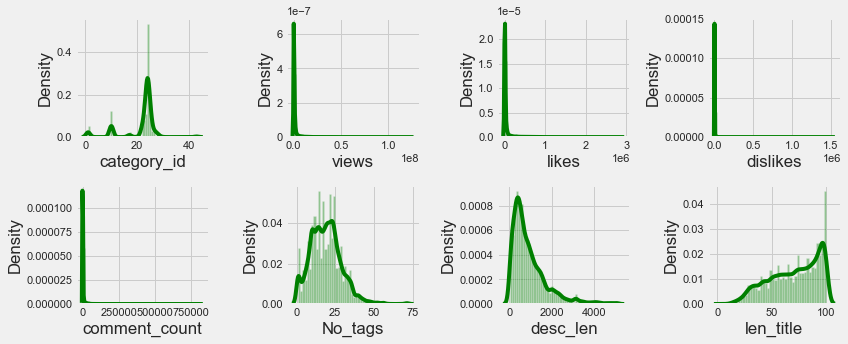

In [11]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(2, len(num)/2, i+1)
    sns.distplot(df[num[i]], color='green')
    plt.tight_layout()

#### Boxplot

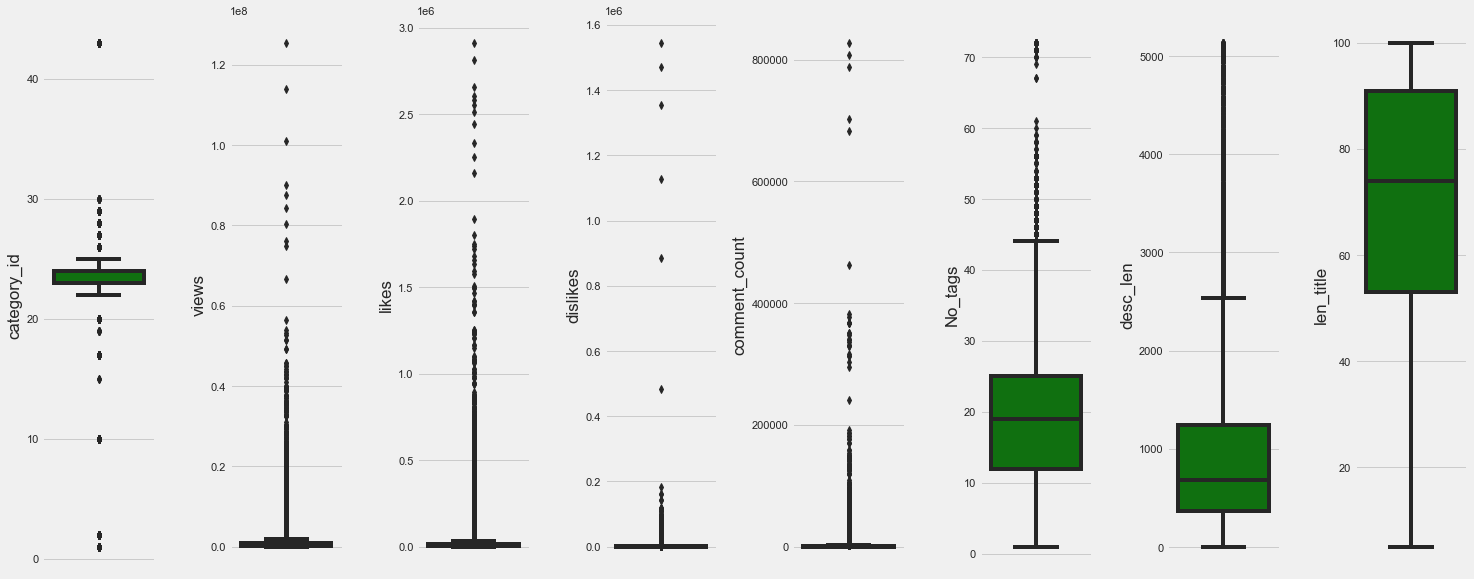

In [12]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='green', orient='v')
    plt.tight_layout()

<b>Kesimpulan :</b>
<br>Berdasarkan hasil visualisasi dari Box Plot, untuk feature bertipe data numeric(category_id,likes,dislikes,comment_count,no_tags masih terdapat sangat banyak outlier begitu pula dengan targetnya. Perlu dilakukan outlier handling menggunakan metode zscore & IQR.

### Multivariate Analysis

<Figure size 1080x1080 with 0 Axes>

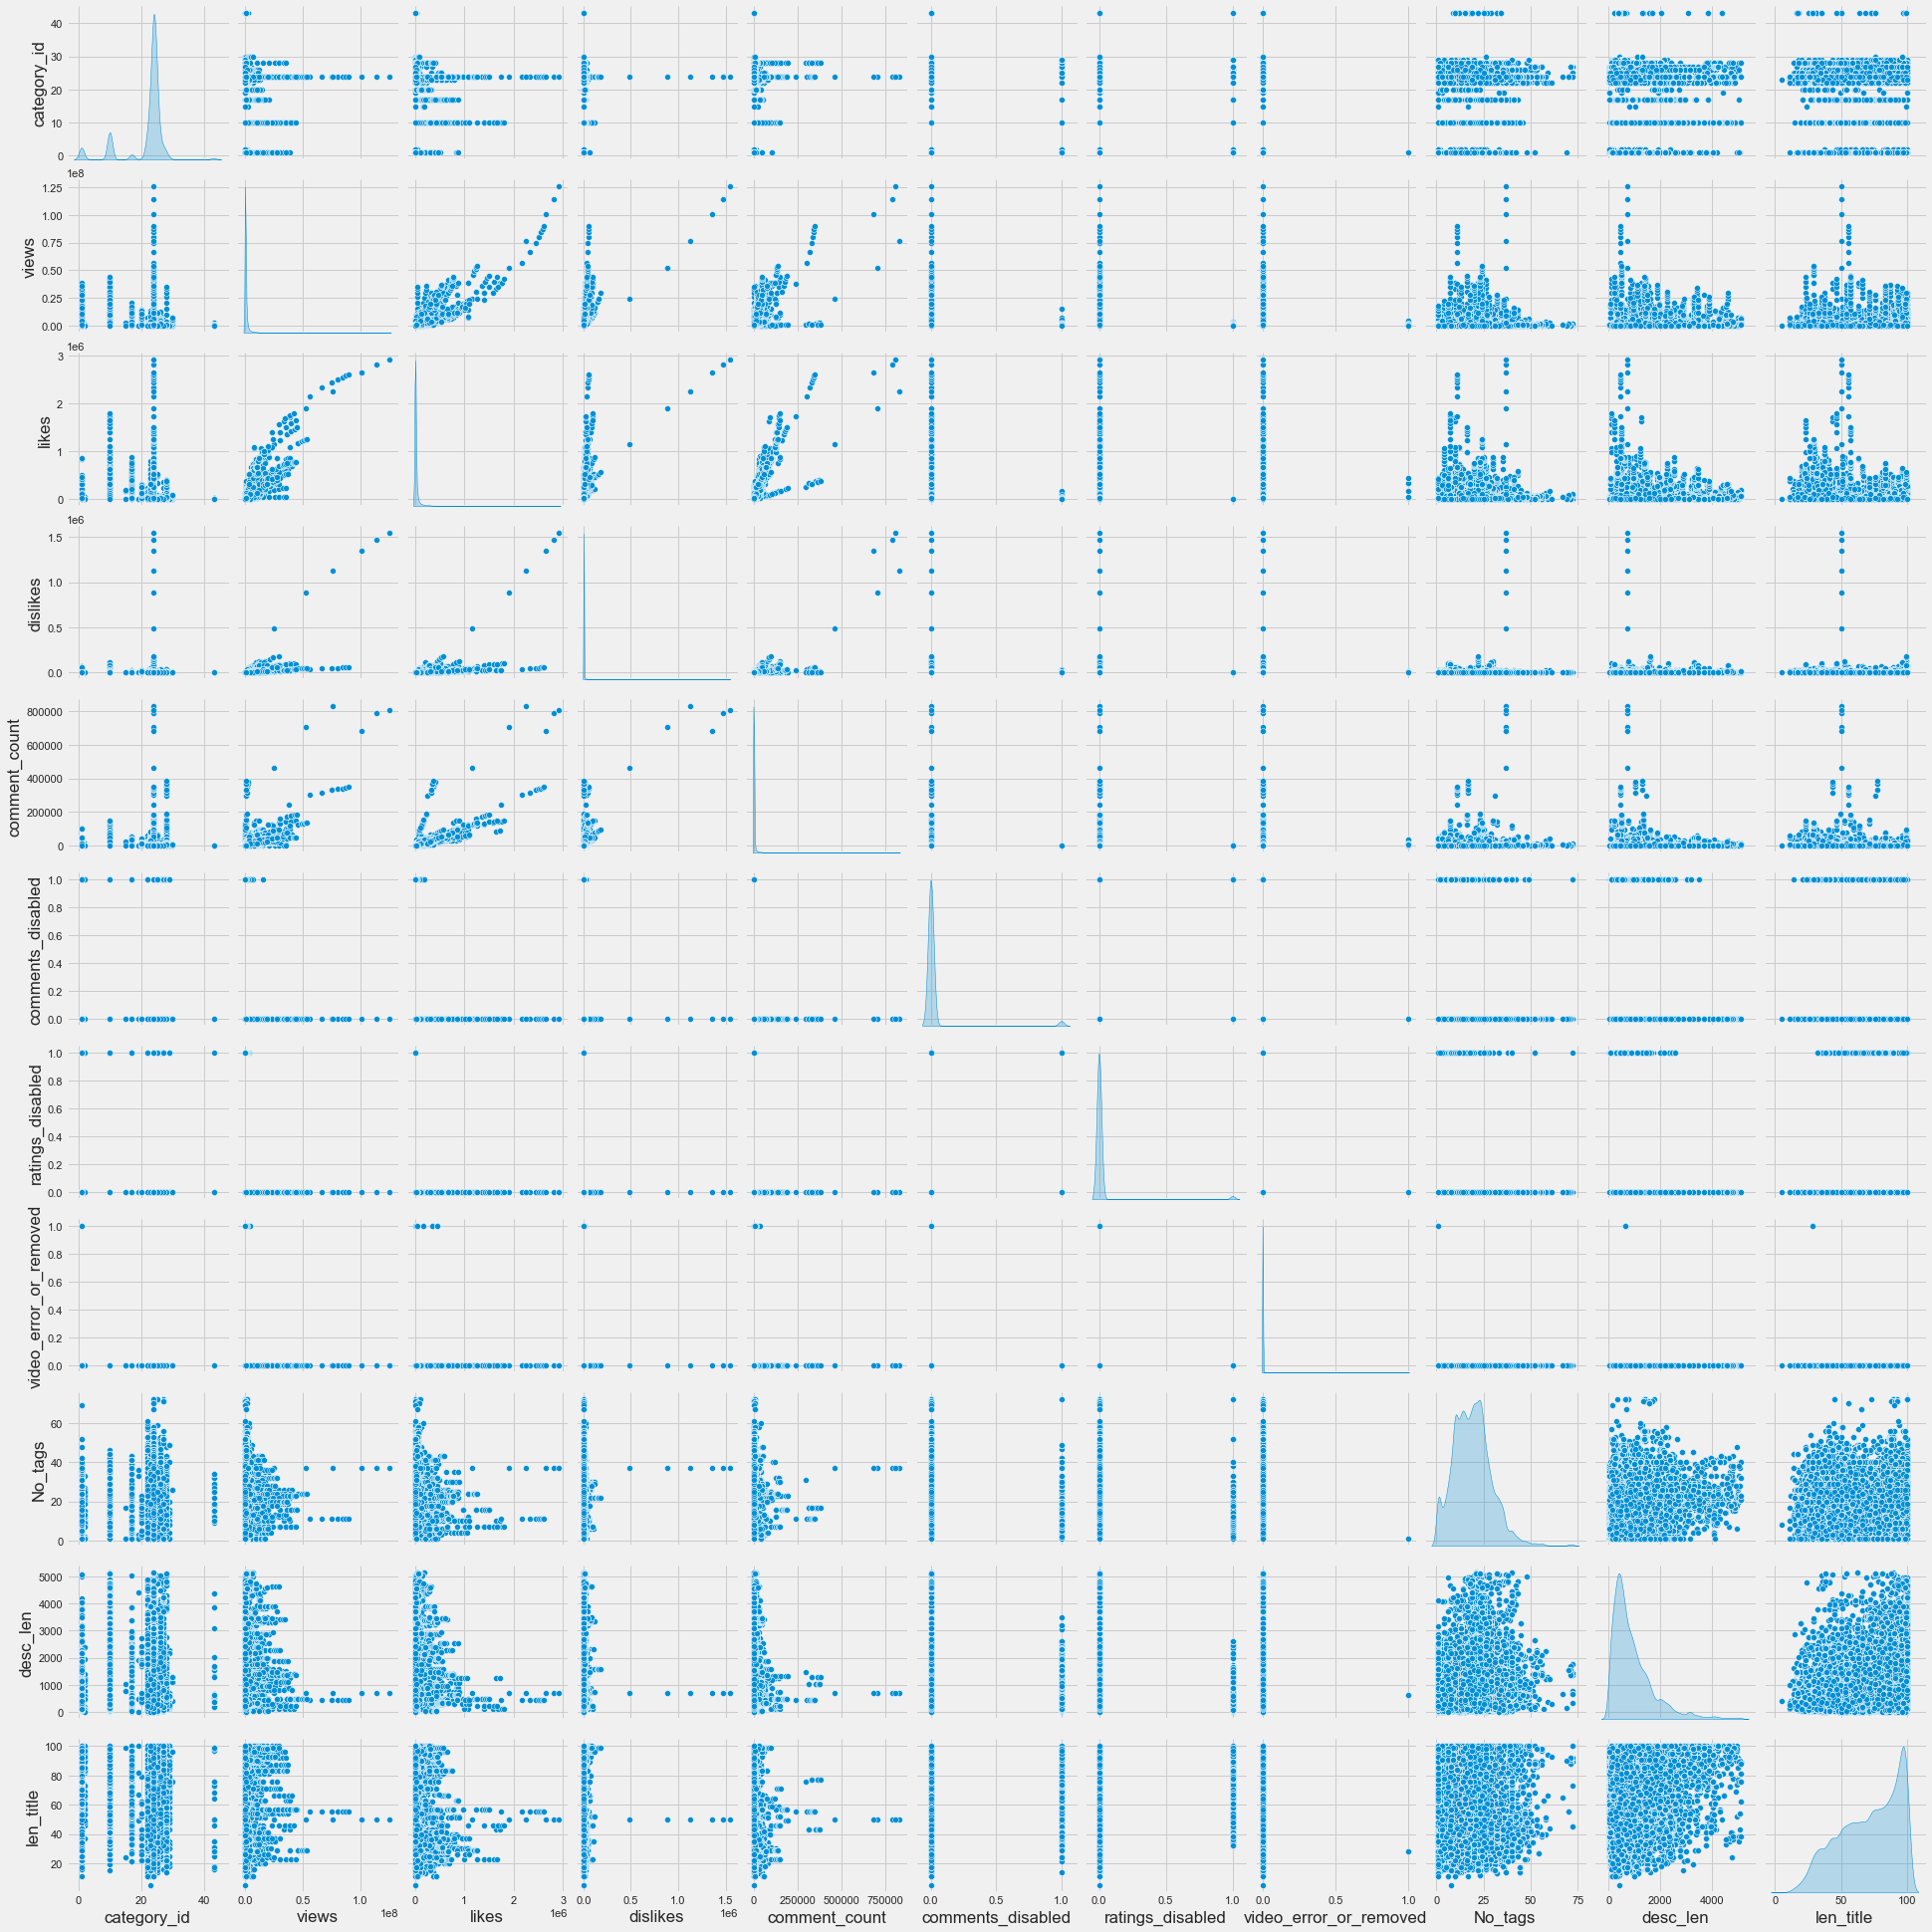

In [13]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.savefig('multivar.png');

<b>Kesimpulan :</b>
<br>Berdasarkan hasil visualisasi dari Pair Plot, terlihat likes dan views memilki pola korelasi yang positif, begitu juga antara feature comment_count dengan likes terlihat memiliki korelasi yang positif.

<AxesSubplot:>

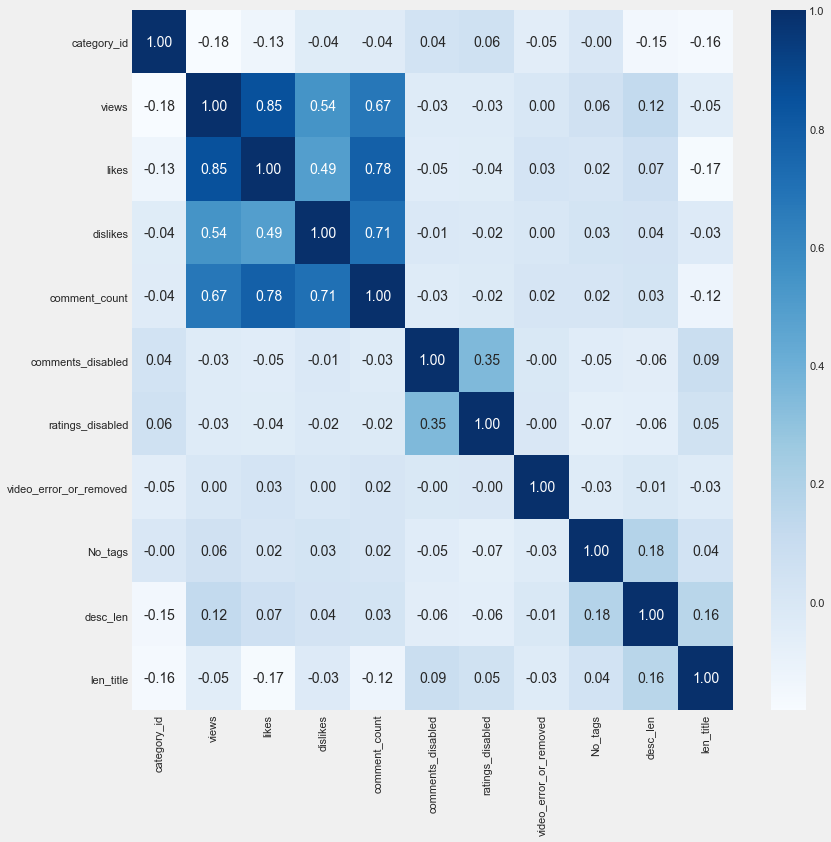

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<b>Kesimpulan :</b>
<br>Berdasarkan visualisasi menggunakan function corr untuk pengecekan korelasi pada setiap feature bertipe data numeric[int64], didapatkan nilai korelasi antar feature dengan sifat positif, negatif maupun yang tidak memiliki korelasi sama sekali terhadapt target, penjelasan detail sebagai berikut :

Feature Berkorelasi Positif (Scanning Correlation dengan nilai > 0.3)
<br>● 0.85 (likes & views)
<br>● 0.78 (likes & comment_count)
<br>● 0.71 (dislikes & comment_count)
<br>● 0.67 (comment & count-views)
<br>● 0.54 (views & dislikes)
<br>● 0.49 (likes & dislikes)
<br>● 0.35 (comments_disabled & rating_disabled)
<br>Dari data korelasi yang sudah diurutkan dari nilai terbesar hingga terkecil didapatkan 3 korelasi antar feature dengan nilai diatas 0.7 dimana korelasi tersebut bisa menandakan adanya feature-feature redundant. Namun korelasi yang tinggi antar feature dengan target harus dipertahankan seperti pada (likes-views), yang perlu ditinjau kembali adalah korelasi yang tinggi antar featurenya seperti (likes-comment_count) & (dislikes-comment_count). Untuk case ini feature comment_count bisa dihilangkan karena memiliki indikasi redundant di lebih dari 1 feature.

## EDA Tipe Data Categorical (Statistic)

In [15]:
df[cat].describe()

,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


<b>Kesimpulan :</b>
<br>Dari df.info() sebelumnya pada feature tags tidak terindikasi memiliki value yang kosong/null, namun jika ditinjau lebih dalam lagi kolom tags memiliki value == '[none]' dimana dari value tersebut dapat diindikasikan sama dengan nilai null atau tidak memiliki value. Jumlah value == '[none]' pada kolom tags memiliki persentase 3% atau sebanyak 1120 dari total keseluruhan data. 

In [16]:
print('Jumlah penonton dengan segmentasi jumlah views 0-10.000: ', df[df['views']<=10000].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 10.000-100.000: ',df[(df['views']>10000) & (df['views']<=100000)].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 100.000-500.000: ',df[(df['views']>100000) & (df['views']<=500000)].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 500.000-1000.000: ',df[(df['views']>500000) & (df['views']<=1000000)].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 1000.000-10.000.000: ',df[(df['views']>1000000) & (df['views']<=10000000)].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 10.000.000-50.000.000: ',df[(df['views']>10000000) & (df['views']<=50000000)].sort_values(['views'],ascending=False)['views'].count())
print('Jumlah penonton dengan segmentasi jumlah views 50.000.000-100.000.000: ',df[(df['views']>50000000) & (df['views']<=100000000)].sort_values(['views'],ascending=False)['views'].count())

Jumlah penonton dengan segmentasi jumlah views 0-10.000:  28
Jumlah penonton dengan segmentasi jumlah views 10.000-100.000:  7227
Jumlah penonton dengan segmentasi jumlah views 100.000-500.000:  16123
Jumlah penonton dengan segmentasi jumlah views 500.000-1000.000:  5825
Jumlah penonton dengan segmentasi jumlah views 1000.000-10.000.000:  6970
Jumlah penonton dengan segmentasi jumlah views 10.000.000-50.000.000:  602
Jumlah penonton dengan segmentasi jumlah views 50.000.000-100.000.000:  13


In [17]:
df[(df['views']>50000000) & (df['views']<=100000000)].sort_values(['views'],ascending=False)[['title']]

,title
4383,Marvel Studios' Avengers: Infinity War Officia...
4148,Marvel Studios' Avengers: Infinity War Officia...
3927,Marvel Studios' Avengers: Infinity War Officia...
3740,Marvel Studios' Avengers: Infinity War Officia...
4647,YouTube Rewind: The Shape of 2017 | #YouTubeRe...
3558,Marvel Studios' Avengers: Infinity War Officia...
3379,Marvel Studios' Avengers: Infinity War Officia...
3183,Marvel Studios' Avengers: Infinity War Officia...
28827,VENOM - Official Trailer (HD)
28615,VENOM - Official Trailer (HD)


<b>Kesimpulan :</b>
<br>Sebagai contoh bisa dilihat title video dengan view terbanyak adalah judul video mengandung keyword 'Marvel/Venom', hal ini bisa dijadikan pertimbangan lebih lanjut untuk segmentasi pengelompokkan category video dengan jumlah views tinggi, medium atau rendah di feature engineering.

## EDA Tipe Data Boolean (Statistic)

In [18]:
df[bool_df].describe().reset_index()

,index,comments_disabled,ratings_disabled,video_error_or_removed
0,count,36791,36791,36791
1,unique,2,2,2
2,top,False,False,False
3,freq,35611,36034,36780


<b>Kesimpulan :</b>
<br>Untuk tipe data boolean pada value comments_disabled, ratings_disabled & video_error_or_removed memiliki Top Frekuensi 'False' dengan persentase > 95% pada ketiga feature tersebut. Oleh karena itu dapat disimpulkan Account pemiliki kanal Youtube hampir semua mengatifkan kolom komentar, status rating dan status video dalam keadaan aktif dan tidak dihapus.

## EDA Tipe Data DateTime (Statistic)

In [19]:
df[date].describe()

,publish_date
count,36791
unique,219
top,2018-05-17 00:00:00
freq,318
first,2017-05-27 00:00:00
last,2018-06-13 00:00:00


<b>Kesimpulan :</b>
<br>Untuk tipe data Datetime pada feature <b>publish_date</b> kita bisa melakukan feature extraction mengambil value (bulan/tanggal/tahun) jika ingin melakukan feature engineering, begitu pula dengan feature <b>publish_time</b>, kita juga bisa melakukan feature engineering pada feature tersebut, namun karena feature publish_time masih bertipe data object kita harus mengkonversi terlebih dahulu ke tipe data datetime.
Reference : https://towardsdatascience.com/feature-engineering-on-date-time-data-90f6e954e6b8

# Data Preprocessing
Tuliskan hal yang dilakukan pada proses preprocessing disini (jika ada)

In [20]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Missing Data

### Column Description
Jika dibandingkan dengan baris yang berjumlah 36791, maka 45 null values pada kolom description sangat tidak signifikan. Penyelesaian yang cocok terkait kondisi ini adalah langsung menghapus baris dengan values null pada kolom description dari dataframe.

In [21]:
df.dropna(inplace=True, subset=["description"])
df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### Column Tags
Value [none] tidak akan mungkin diganti dengan modus karena [none] sendiri adalah sebuah modus yang berada di kolom tags. Untuk menyelesaikan masalah ini, maka terdapat empat pilihan yang bisa diambil. Pertama, mengganti semua value [none] dengan second mode. Kedua, mengingat [none] sendiri adalah modus, kita dapat menghapus kolom tags. Ketiga, mengganti seluruh value [none] dengan "No Tags". Keempat, membiarkan value [none] tanpa dilakukan pengolahan lebih lanjut karena pada dasar logikanya, Youtube tidak mewajibkan creator untuk menyematkan tags pada video mereka. Kami memilih opsi keempat sebagai solusi paling aman.

## Drop Column
Berdasarkan EDA, maka column yang redundant adalah column comment_count.

In [22]:
df = df.drop(["comment_count"], axis=1)
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,False,False,False,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,False,False,False,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13


## Duplicated Data
Duplicated data yang berjumlah 20282 terjadi karena video yang sama terdeteksi menjadi trending di tanggal yang berbeda. Oleh karena itu, penerapan paling tepat dari drop duplicated data adalah dengan menggunakan parameter keep="last".

In [23]:
df.duplicated(subset=["title", "channel_title", "publish_time", "publish_date"]).sum()

20282

In [24]:
df[df.duplicated(subset=["title", "channel_title", "publish_time", "publish_date"])].sort_values(["title", "views"], ascending=[False, True])

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
31781,2018-05-17,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,06:39:18,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",215725,6203,203,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...,10,189,47,2018-05-16
31837,2018-05-18,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,06:39:18,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",384964,7488,316,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...,10,189,47,2018-05-16
31970,2018-05-18,😃😝 ખજુરભાઈ નું ખેતર - khajubhai ni moj - IPL.10,Khajur Bhai Ni Moj,23,06:39:18,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",384964,7488,316,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ ન...,10,189,47,2018-05-16
7614,2017-12-24,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...,Kabaddi365.com,17,22:33:34,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",158586,2113,151,False,False,False,🔴[Live] Sardulgarh (Mansa) Kabaddi Tournament ...,17,596,58,2017-12-22
8827,2017-12-31,🔴[Live] Raikot (Ludhiana) Punjab Kabaddi Acade...,Kabaddi365.com,17,15:34:11,"Kabaddi365.com|""kabbadi tournament""|""kabaddi v...",162904,1954,139,False,False,False,🔴[Live] Raikot (Ludhiana) Punjab Kabaddi Acade...,16,615,77,2017-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,2017-12-28,निरहुआ पैसेवाला NIRAHUA FULL MOVIE ( NEW 201...,Wave Music - Bhojpuri Movies,1,05:00:04,"nirahua|""dinesh lal yadav nirahua""|""dinesh lal...",868173,1453,622,False,False,False,निरहुआ पैसेवाला NIRAHUA FULL MOVIE ( NEW 201...,20,665,85,2017-12-26
8381,2017-12-29,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( F...,Filmistaan,1,11:30:01,"hd|""latest bhojpuri film""|""khesari lal yadav""|...",1047143,1749,924,False,False,False,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( HD...,26,620,84,2017-12-27
8567,2017-12-30,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( F...,Filmistaan,1,11:30:01,"hd|""latest bhojpuri film""|""khesari lal yadav""|...",1292467,2154,1176,False,False,False,जादूगरनी नागिन आज तक की सब से बड़ी फ़िल्म ( HD...,26,620,84,2017-12-27
9109,2018-01-02,जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म P...,Wave Music - Bhojpuri Movies,1,04:30:00,"pawan singh|""pawan singh superhit movie 2018""|...",1998460,3765,1951,False,False,False,जंगली शेर 2018 भोजपुरी की सबसे बड़ी फिल्म P...,19,714,94,2017-12-31


In [25]:
df = df.drop_duplicates(subset=["title", "channel_title", "publish_time", "publish_date"], keep="last")
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
6,2017-11-14,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,16:41:15,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,18,1411,96,2017-11-11
12,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,09:51:59,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,True,False,False,Renu Desai gives a low rating for Pawan Kalyan...,20,858,85,2017-11-13
13,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,24,19:19:13,"the voice of india|""TVOI""|""the voice of india ...",472413,2611,250,False,False,False,Peehu Srivastav grabs the attention of the jud...,12,1351,92,2017-11-11
16,2017-11-14,TYPES OF STUDENTS- | Elvish Yadav |,Elvish yadav,23,11:26:02,"TYPES OF STUDENTS ELVISH YADAV|""elvish yadav""|...",344545,25717,417,False,False,False,This video shows different types of students p...,11,248,35,2017-11-13
22,2017-11-14,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,15:00:01,"deivamagal|""deiva magal""|""deiva magal serial""|...",387221,2159,1214,False,False,False,Deivamagal Episode 1387\nSubscribe: https://go...,18,472,33,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,False,False,False,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,False,False,False,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13


In [26]:
df.duplicated(subset=["title", "channel_title", "publish_time", "publish_date"]).sum()

0

## Outliers
Terdapat beberapa feature yang berdasarkan EDA memiliki distribusi tidak normal karena memiliki outlier, di antaranya;
<br> a. category_id
<br> b. likes
<br> c. dislikes
<br> d. comment_count
<br> e. no_tags
<br> f. desc_len
<br> g. len_title

In [27]:
from scipy import stats

### Z-Score
Z-Score cocok digunakan pada feature yang memiliki distribusi hampir mendekati normal. Feature terkait yakni;
<br> a. category_id
<br> b. no_tags

In [28]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ["category_id", "No_tags"]:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 16464
Jumlah baris setelah memfilter outlier: 15632


### IQR
IQR cocok digunakan pada feature yang memiliki distribusi skewed. Feature terkait yakni;
<br> a. likes
<br> b. dislikes
<br> c. comment_count
<br> d. desc_len
<br> e. len_title

In [29]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ["likes", "dislikes", "desc_len", "len_title"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 15632
Jumlah baris setelah memfilter outlier: 12324


## Normalization & Standardization

In [30]:
df.describe()

,category_id,views,likes,dislikes,No_tags,desc_len,len_title
count,12324.000000,1.232400e+04,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000
mean,23.342178,2.551048e+05,2366.997485,231.610191,17.742454,751.239776,72.425592
std,3.523539,3.049209e+05,3071.083348,259.390456,9.273577,554.021640,20.575827
min,10.000000,4.024000e+03,0.000000,0.000000,1.000000,3.000000,5.000000
25%,24.000000,7.546725e+04,412.750000,56.000000,10.000000,337.000000,58.000000
50%,24.000000,1.547345e+05,1084.000000,136.000000,18.000000,600.000000,75.000000
75%,25.000000,3.134100e+05,2974.250000,308.000000,24.000000,1059.000000,91.000000
max,30.000000,5.027872e+06,15365.000000,1316.000000,49.000000,2486.000000,100.000000


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Normalization

In [32]:
df['category_id_norm'] = MinMaxScaler().fit_transform(df['category_id'].values.reshape(len(df), 1))
df['likes_norm'] = MinMaxScaler().fit_transform(df['likes'].values.reshape(len(df), 1))
df['dislikes_norm'] = MinMaxScaler().fit_transform(df['dislikes'].values.reshape(len(df), 1))
df['No_tags_norm'] = MinMaxScaler().fit_transform(df['No_tags'].values.reshape(len(df), 1))
df['desc_len_norm'] = MinMaxScaler().fit_transform(df['desc_len'].values.reshape(len(df), 1))
df['len_title_norm'] = MinMaxScaler().fit_transform(df['len_title'].values.reshape(len(df), 1))

### Standardization

In [33]:
df['category_id_std'] = StandardScaler().fit_transform(df['category_id'].values.reshape(len(df), 1))
df['likes_std'] = StandardScaler().fit_transform(df['likes'].values.reshape(len(df), 1))
df['dislikes_std'] = StandardScaler().fit_transform(df['dislikes'].values.reshape(len(df), 1))
df['No_tags_std'] = StandardScaler().fit_transform(df['No_tags'].values.reshape(len(df), 1))
df['desc_len_std'] = StandardScaler().fit_transform(df['desc_len'].values.reshape(len(df), 1))
df['len_title_std'] = StandardScaler().fit_transform(df['len_title'].values.reshape(len(df), 1))

In [34]:
df.describe()

,category_id,views,likes,dislikes,No_tags,desc_len,len_title,category_id_norm,likes_norm,dislikes_norm,No_tags_norm,desc_len_norm,len_title_norm,category_id_std,likes_std,dislikes_std,No_tags_std,desc_len_std,len_title_std
count,12324.000000,1.232400e+04,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,1.232400e+04,1.232400e+04,1.232400e+04,1.232400e+04,1.232400e+04,1.232400e+04
mean,23.342178,2.551048e+05,2366.997485,231.610191,17.742454,751.239776,72.425592,0.667109,0.154051,0.175996,0.348801,0.301345,0.709743,1.273554e-15,-2.078740e-16,-1.708756e-16,-2.660427e-16,1.364807e-17,-1.170148e-15
std,3.523539,3.049209e+05,3071.083348,259.390456,9.273577,554.021640,20.575827,0.176177,0.199875,0.197105,0.193200,0.223126,0.216588,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,10.000000,4.024000e+03,0.000000,0.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.786739e+00,-7.707682e-01,-8.929380e-01,-1.805467e+00,-1.350615e+00,-3.277065e+00
25%,24.000000,7.546725e+04,412.750000,56.000000,10.000000,337.000000,58.000000,0.700000,0.026863,0.042553,0.187500,0.134515,0.557895,1.867012e-01,-6.363640e-01,-6.770385e-01,-8.349279e-01,-7.477264e-01,-7.011226e-01
50%,24.000000,1.547345e+05,1084.000000,136.000000,18.000000,600.000000,75.000000,0.700000,0.070550,0.103343,0.354167,0.240435,0.736842,1.867012e-01,-4.177840e-01,-3.686106e-01,2.777318e-02,-2.729964e-01,1.251231e-01
75%,25.000000,3.134100e+05,2974.250000,308.000000,24.000000,1059.000000,91.000000,0.750000,0.193573,0.234043,0.479167,0.425292,0.905263,4.705183e-01,1.977404e-01,2.945093e-01,6.747990e-01,5.555247e-01,9.027662e-01
max,30.000000,5.027872e+06,15365.000000,1316.000000,49.000000,2486.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.889604e+00,4.232555e+00,4.180700e+00,3.370740e+00,3.131341e+00,1.340190e+00


# Feature Engineering (Version-1)

In [35]:
df['comments_disabled_label'] = df['comments_disabled'].astype('category').cat.codes
df['ratings_disabled_label'] = df['ratings_disabled'].astype('category').cat.codes
df['video_error_or_removed_label'] = df['video_error_or_removed'].astype('category').cat.codes

In [36]:
df = df.drop(['likes_std', 'dislikes_std', 'desc_len_std', 'len_title_std', 'category_id_norm', 'No_tags_norm', 'category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed' ], axis=1)

In [37]:
df.head(2)

,trending_date,title,channel_title,publish_time,tags,views,description,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label
12,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,09:51:59,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,Renu Desai gives a low rating for Pawan Kalyan...,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0
13,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,19:19:13,"the voice of india|""TVOI""|""the voice of india ...",472413,Peehu Srivastav grabs the attention of the jud...,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0


In [38]:
df = df.drop(['title', 'tags', 'description'], axis = 1)

In [39]:
df.head(2)

,trending_date,channel_title,publish_time,views,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label
12,2017-11-14,ABN Telugu,09:51:59,156085,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0
13,2017-11-14,The Voice India Kids,19:19:13,472413,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12324 entries, 12 to 36789
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   trending_date                 12324 non-null  object        
 1   channel_title                 12324 non-null  object        
 2   publish_time                  12324 non-null  object        
 3   views                         12324 non-null  int64         
 4   publish_date                  12324 non-null  datetime64[ns]
 5   likes_norm                    12324 non-null  float64       
 6   dislikes_norm                 12324 non-null  float64       
 7   desc_len_norm                 12324 non-null  float64       
 8   len_title_norm                12324 non-null  float64       
 9   category_id_std               12324 non-null  float64       
 10  No_tags_std                   12324 non-null  float64       
 11  comments_disabled_label    

In [41]:
df['publish_date_year'] = df['publish_date'].dt.year
df['publish_date_month'] = df['publish_date'].dt.month
df['publish_date_day'] = df['publish_date'].dt.day

In [42]:
df.trending_date = pd.to_datetime(df.trending_date)
df.head(2)

,trending_date,channel_title,publish_time,views,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day
12,2017-11-14,ABN Telugu,09:51:59,156085,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,2017,11,13
13,2017-11-14,The Voice India Kids,19:19:13,472413,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,2017,11,11


In [43]:
df['trending_date_year'] = df['trending_date'].dt.year
df['trending_date_month'] = df['trending_date'].dt.month
df['trending_date_day'] = df['trending_date'].dt.day

In [44]:
df.head(2)

,trending_date,channel_title,publish_time,views,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day,trending_date_year,trending_date_month,trending_date_day
12,2017-11-14,ABN Telugu,09:51:59,156085,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,2017,11,13,2017,11,14
13,2017-11-14,The Voice India Kids,19:19:13,472413,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,2017,11,11,2017,11,14


In [45]:
df.groupby(['channel_title']).agg({'trending_date':['count']}).reset_index

<bound method DataFrame.reset_index of                        trending_date
                               count
channel_title                       
1 Kg Biriyani                     15
1 Minutes news                     4
10 DEGREE INDIAN FACTS            13
10TVNewsChannel                    8
2 Minute News Today                1
...                              ...
भक्ति                             26
वास्तु उपाय                        5
জীবন-সমস্যার সমাধান                1
ഖല്‍ബാണ് ലീഗ്                      1
വിശ്വാസം അതല്ലേ എല്ലാം             5

[1175 rows x 1 columns]>

Terdapat 1175 nama judul channel, jika dilakukan label encoding, maka tidak efektif karena jumlahnya terlalu banyak.. Oleh karena itu, fitur ini dapat didrop.

In [46]:
df = df.drop(['channel_title'], axis = 1)

## Melakukan concat pada kolom publish_time

Data yang diambil hanya jam saja, lalu data tersebut digolongkan ke dalam 4 kategori, yaitu:
- excellent: pukul 18 - 23 --> merupakan waktu istirahat, jadi baik untuk publikasi (score = 4)
- good: pukul 13 - 17 --> merupakan jam kerja namun jam pulang sekolah, kemungkinan video hanya ditonton oleh orang yang tidak bekerja dan anak sekolah (score = 3)
- enough: pukul 7 - 12 --> merupakan jam kerja dan jam sekolah, kemungkinan video hanya ditonton oleh orang yang tidak bekerja (score = 2)
- bad: pukul 23 - 6 --> merupakan jam tidur, jadi buruk untuk publikasi (scpre = 1)


In [47]:
df['publish-time'] = df['publish_time'].str.split(':').str[0]

In [48]:
df.head(2)

,trending_date,publish_time,views,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day,trending_date_year,trending_date_month,trending_date_day,publish-time
12,2017-11-14,09:51:59,156085,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,2017,11,13,2017,11,14,09
13,2017-11-14,19:19:13,472413,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,2017,11,11,2017,11,14,19


In [49]:
df.groupby(['publish-time']).agg({'trending_date':['count']}).reset_index

<bound method DataFrame.reset_index of              trending_date
                     count
publish-time              
00                     213
01                     262
02                     436
03                     479
04                     580
05                     738
06                     717
07                     670
08                     635
09                     661
10                     645
11                     697
12                     769
13                     704
14                     842
15                     728
16                     713
17                     571
18                     267
19                     187
20                     132
21                     164
22                     229
23                     285>

In [50]:
df['publish-time'] = pd.to_numeric(df['publish-time'])

In [51]:
list_segment = []
for i, kolom in df.iterrows():
    if kolom['publish-time'] >= 18 and kolom['publish-time'] <= 23:
        segment = 4
    elif kolom['publish-time'] >= 13 and kolom['publish-time'] <= 17:
        segment = 3
    elif kolom['publish-time'] >= 7 and kolom['publish-time'] <= 12:
        segment = 2
    elif kolom['publish-time'] >= 0 and kolom['publish-time'] <= 5:
        segment = 1
    else:
        segment = 0
    list_segment.append(segment)
df['time'] = list_segment
df.head(2)

,trending_date,publish_time,views,publish_date,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day,trending_date_year,trending_date_month,trending_date_day,publish-time,time
12,2017-11-14,09:51:59,156085,2017-11-13,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,2017,11,13,2017,11,14,9,2
13,2017-11-14,19:19:13,472413,2017-11-11,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,2017,11,11,2017,11,14,19,4


In [52]:
df = df.drop(['trending_date', 'publish_time', 'publish_date', 'publish-time' ], axis=1)

In [53]:
df.head(2)

,views,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day,trending_date_year,trending_date_month,trending_date_day,time
12,156085,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,2017,11,13,2017,11,14,2
13,472413,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,2017,11,11,2017,11,14,4


In [54]:
df.describe()

,views,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_date_year,publish_date_month,publish_date_day,trending_date_year,trending_date_month,trending_date_day,time
count,1.232400e+04,12324.000000,12324.000000,12324.000000,12324.000000,1.232400e+04,1.232400e+04,12324.000000,12324.000000,12324.0,12324.000000,12324.000000,12324.00000,12324.000000,12324.000000,12324.000000,12324.000000
mean,2.551048e+05,0.154051,0.175996,0.301345,0.709743,1.273554e-15,-2.660427e-16,0.042681,0.032376,0.0,2017.714865,5.451558,15.80185,2017.725738,5.385346,15.899221,2.157741
std,3.049209e+05,0.199875,0.197105,0.223126,0.216588,1.000041e+00,1.000041e+00,0.202145,0.177003,0.0,0.451497,4.117838,8.66734,0.446160,4.089232,8.731065,1.061424
min,4.024000e+03,0.000000,0.000000,0.000000,0.000000,-3.786739e+00,-1.805467e+00,0.000000,0.000000,0.0,2017.000000,1.000000,1.00000,2017.000000,1.000000,1.000000,0.000000
25%,7.546725e+04,0.026863,0.042553,0.134515,0.557895,1.867012e-01,-8.349279e-01,0.000000,0.000000,0.0,2017.000000,2.000000,8.00000,2017.000000,2.000000,8.000000,1.000000
50%,1.547345e+05,0.070550,0.103343,0.240435,0.736842,1.867012e-01,2.777318e-02,0.000000,0.000000,0.0,2018.000000,4.000000,16.00000,2018.000000,4.000000,16.000000,2.000000
75%,3.134100e+05,0.193573,0.234043,0.425292,0.905263,4.705183e-01,6.747990e-01,0.000000,0.000000,0.0,2018.000000,11.000000,23.00000,2018.000000,11.000000,23.000000,3.000000
max,5.027872e+06,1.000000,1.000000,1.000000,1.000000,1.889604e+00,3.370740e+00,1.000000,1.000000,0.0,2018.000000,12.000000,31.00000,2018.000000,12.000000,31.000000,4.000000


In [55]:
df['publish_year_norm'] = MinMaxScaler().fit_transform(df['publish_date_year'].values.reshape(len(df), 1))
df['publish_month_norm'] = MinMaxScaler().fit_transform(df['publish_date_month'].values.reshape(len(df), 1))
df['publish_day_std'] = StandardScaler().fit_transform(df['publish_date_day'].values.reshape(len(df), 1))
df['trending_year_norm'] = MinMaxScaler().fit_transform(df['trending_date_year'].values.reshape(len(df), 1))
df['trending_month_norm'] = MinMaxScaler().fit_transform(df['trending_date_month'].values.reshape(len(df), 1))
df['trending_day_std'] = StandardScaler().fit_transform(df['trending_date_day'].values.reshape(len(df), 1))
df['time_std'] = StandardScaler().fit_transform(df['time'].values.reshape(len(df), 1))

In [56]:
df = df.drop(['publish_date_year', 'publish_date_month', 'publish_date_day', 'trending_date_year', 'trending_date_month', 'trending_date_day', 'time'], axis=1)

In [57]:
df.head(2)

,views,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,comments_disabled_label,ratings_disabled_label,video_error_or_removed_label,publish_year_norm,publish_month_norm,publish_day_std,trending_year_norm,trending_month_norm,trending_day_std,time_std
12,156085,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,1,0,0,0.0,0.909091,-0.323278,0.0,0.909091,-0.217533,-0.148619
13,472413,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,0,0,0,0.0,0.909091,-0.554039,0.0,0.909091,-0.217533,1.735719


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12324 entries, 12 to 36789
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   views                         12324 non-null  int64  
 1   likes_norm                    12324 non-null  float64
 2   dislikes_norm                 12324 non-null  float64
 3   desc_len_norm                 12324 non-null  float64
 4   len_title_norm                12324 non-null  float64
 5   category_id_std               12324 non-null  float64
 6   No_tags_std                   12324 non-null  float64
 7   comments_disabled_label       12324 non-null  int8   
 8   ratings_disabled_label        12324 non-null  int8   
 9   video_error_or_removed_label  12324 non-null  int8   
 10  publish_year_norm             12324 non-null  float64
 11  publish_month_norm            12324 non-null  float64
 12  publish_day_std               12324 non-null  float64
 13  

# Feature Engineering (Version-2)

Feature engineering pada iterasi ke-dua kami tidak menghilangkan feature yang lain seperti sebelumnya dan tidak pula melakukan standarisasi atau normalisasi. Namun untuk data duplikat dan outlier tetap kami hilangkan, serta melakukan one-hot encoding untuk beberapa feature. Jadi pada Feature Engineering pertama maupun kedua jumlah data yang digunakan berjumlah sama.

In [59]:
df_2.shape

(36791, 18)

## Menghilangkan Data Duplikat

In [60]:
df_2.dropna(inplace=True, subset=["description"])
df_2.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

In [61]:
df_2.duplicated(subset=["title", "channel_title", "publish_time", "publish_date"]).sum()

20282

In [62]:
df_2 = df_2.drop_duplicates(subset=["title", "channel_title", "publish_time", "publish_date"], keep="last")
df_2.shape

(16464, 18)

## Outliers

### Z-score

In [63]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_2)}')

filtered_entries = np.array([True] * len(df_2))

for col in ["category_id", "No_tags"]:
    zscore = abs(stats.zscore(df_2[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_2 = df_2[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_2)}')

Jumlah baris sebelum memfilter outlier: 16464
Jumlah baris setelah memfilter outlier: 15632


### IQR

In [64]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_2)}')

filtered_entries = np.array([True] * len(df_2))
for col in ["likes", "dislikes", "desc_len", "len_title"]:
    Q1 = df_2[col].quantile(0.25)
    Q3 = df_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_2[col] >= low_limit) & (df_2[col] <= high_limit)) & filtered_entries
    
df_2 = df_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_2)}')

Jumlah baris sebelum memfilter outlier: 15632
Jumlah baris setelah memfilter outlier: 12324


## Feature Engineering

In [65]:
df_dummy = df_2.copy()
df_dummy.trending_date = pd.to_datetime(df_dummy.trending_date)
df_dummy.publish_date = pd.to_datetime(df_dummy.publish_date)
df_dummy.publish_time = pd.to_datetime(df_dummy.publish_time)
df_dummy.head(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
12,2017-11-14,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,2021-12-05 09:51:59,"Resnu desai|""actress renu desai""|""pawan kalyan...",156085,716,53,0,True,False,False,Renu Desai gives a low rating for Pawan Kalyan...,20,858,85,2017-11-13
13,2017-11-14,Peehu Srivastav Performs On Daiya Yeh Main kah...,The Voice India Kids,24,2021-12-05 19:19:13,"the voice of india|""TVOI""|""the voice of india ...",472413,2611,250,174,False,False,False,Peehu Srivastav grabs the attention of the jud...,12,1351,92,2017-11-11


In [66]:
trending_months = df_dummy.trending_date.dt.month
trending_day_of_months = df_dummy.trending_date.dt.day

# first: extract the day name literal
to_one_hot = df_dummy.trending_date.dt.day_name()
# second: one hot encode to 7 columns
trending_days = pd.get_dummies(to_one_hot, prefix='trending_day')
#display data
trending_days

,trending_day_Friday,trending_day_Monday,trending_day_Saturday,trending_day_Sunday,trending_day_Thursday,trending_day_Tuesday,trending_day_Wednesday
12,0,0,0,0,0,1,0
13,0,0,0,0,0,1,0
22,0,0,0,0,0,1,0
29,0,0,0,0,0,1,0
31,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
36783,0,0,0,0,1,0,0
36786,0,0,0,0,1,0,0
36787,0,0,0,0,1,0,0
36788,0,0,0,0,1,0,0


In [67]:
publish_months = df_dummy.publish_date.dt.month
publish_day_of_months = df_dummy.publish_date.dt.day
publish_hours = df_dummy.publish_time.dt.hour

# first: extract the day name literal
to_one_hot = df_dummy.publish_date.dt.day_name()
# second: one hot encode to 7 columns
publish_days = pd.get_dummies(to_one_hot, prefix='publish')
#display data
publish_days

,publish_Friday,publish_Monday,publish_Saturday,publish_Sunday,publish_Thursday,publish_Tuesday,publish_Wednesday
12,0,1,0,0,0,0,0
13,0,0,1,0,0,0,0
22,0,1,0,0,0,0,0
29,0,0,1,0,0,0,0
31,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
36783,0,0,0,0,0,0,1
36786,0,0,0,0,0,0,1
36787,0,0,0,0,0,0,1
36788,0,0,0,0,0,0,1


In [68]:
# trending_is_weekend flag 
trending_day_names = df_dummy.trending_date.dt.day_name()
trending_is_weekend = trending_day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

# Publish_is_weekend flag 
Publish_day_names = df_dummy.publish_date.dt.day_name()
Publish_is_weekend = Publish_day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

In [69]:
# features table
#first step: include features with single column nature
single_engineered_features = pd.DataFrame({
    #publish
    'publish_months' : publish_months,
    'publish_day_of_months' : publish_day_of_months,
    'publish_hours' : publish_hours,
    'Publish_is_weekend' : Publish_is_weekend,
    #trending
    'trending_months' : trending_months,
    'trending_day_of_months' : trending_day_of_months,
    'trending_is_weekend' : trending_is_weekend,
})

all_engineered_features = pd.concat([single_engineered_features, publish_days, trending_days], axis = 1)

# Modelling Feature Engineering (Version-1)

## Linear Regression

In [70]:
X = df.drop(['views'], axis = 1)
y = df[['views']]

In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [72]:
Xtrain.shape

(8626, 16)

In [73]:
ytest.shape

(3698, 1)

In [74]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [76]:
pred = regressor.predict(Xtest)
pred

array([[348535.04924247],
       [171044.9581501 ],
       [345611.98032826],
       ...,
       [385015.27609807],
       [999542.37168369],
       [597731.53788623]])

In [77]:
eval_regression(regressor, pred, Xtrain, ytrain, Xtest,ytest)

MAE: 123608.99
RMSE: 292150.90
R2 score: 0.19


In [78]:
print("train Accuracy : ",regressor.score(Xtrain,ytrain))
print("test Accuracy : ",regressor.score(Xtest,ytest))

train Accuracy :  0.5343997579307659
test Accuracy :  0.1938003346225583


In [79]:
print('Coefficients: \n', regressor.coef_) # The slope

Coefficients: 
 [[ 2.13794487e+05  8.10084010e+05  8.58921942e+04 -2.72804427e+04
  -1.45461705e+04  6.57033407e+03 -4.14135176e+04  1.87532241e+05
   3.50177288e-07 -1.72232501e+07 -1.57692853e+07 -4.08011914e+05
   1.73460962e+07  1.58757068e+07  4.14721412e+05  7.43758955e+02]]


## Ridge

In [80]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(Xtrain, ytrain)

pred = ridge_model.predict(Xtest)
eval_regression(ridge_model, pred, Xtrain, ytrain, Xtest, ytest)

MAE: 125151.13
RMSE: 243960.87
R2 score: 0.44


### Hyperparameter Tunning

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(Xtrain, ytrain)

In [82]:
eval_regression(regressor, pred, Xtrain, ytrain, Xtest,ytest)

MAE: 125151.13
RMSE: 243960.87
R2 score: 0.44


## DecisionTree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)
pred = dt.predict(Xtest)
eval_regression(dt, pred, Xtrain, ytrain, Xtest, ytest)

MAE: 146264.52
RMSE: 311627.68
R2 score: 0.08


## RandomForest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
pred = rf.predict(Xtest)
eval_regression(rf, pred, Xtrain, ytrain, Xtest, ytest)

MAE: 104849.05
RMSE: 233239.11
R2 score: 0.49


### Feature Importance

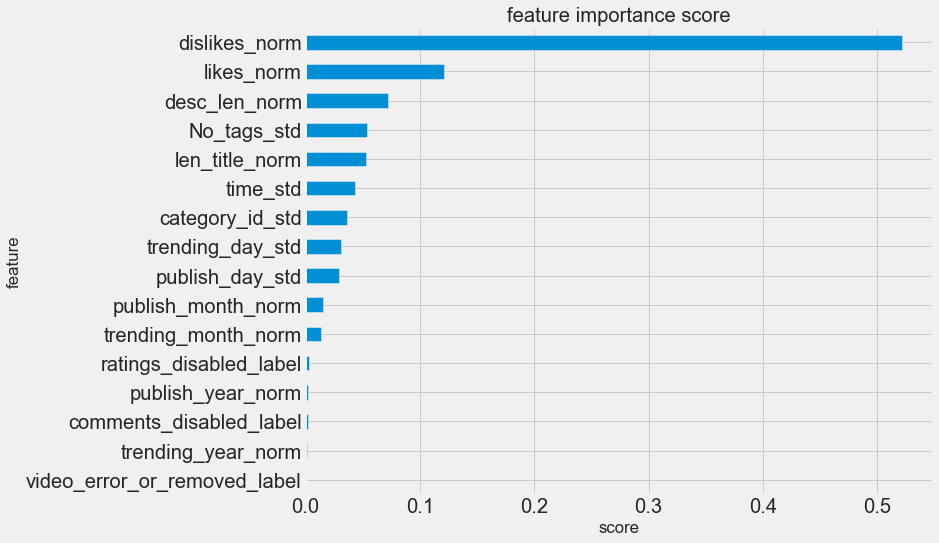

In [85]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
show_feature_importance(rf)

### Drop Feature Based on Feature Importance

In [86]:
df2 = df.drop(['publish_month_norm','trending_month_norm','ratings_disabled_label', "comments_disabled_label", "publish_year_norm", "trending_year_norm", "video_error_or_removed_label"], axis=1)
df2

,views,likes_norm,dislikes_norm,desc_len_norm,len_title_norm,category_id_std,No_tags_std,publish_day_std,trending_day_std,time_std
12,156085,0.046599,0.040274,0.344342,0.842105,0.470518,0.243448,-0.323278,-0.217533,-0.148619
13,472413,0.169932,0.189970,0.542892,0.915789,0.186701,-0.619253,-0.554039,-0.217533,1.735719
22,387221,0.140514,0.922492,0.188884,0.294737,0.186701,0.027773,-0.323278,-0.217533,0.793550
29,261202,0.128279,0.095745,0.116391,0.389474,0.186701,0.459124,-0.554039,-0.217533,-0.148619
31,423009,0.098536,0.263678,0.332662,1.000000,0.186701,-1.158441,-0.323278,-0.217533,-2.032956
...,...,...,...,...,...,...,...,...,...,...
36783,56313,0.435210,0.043313,0.230769,0.642105,0.186701,-1.050603,-0.323278,-0.217533,0.793550
36786,214378,0.214188,0.306991,0.328232,1.000000,-0.097116,0.135611,-0.323278,-0.217533,-0.148619
36787,406828,0.112333,0.363222,0.187273,0.221053,0.186701,-1.050603,-0.323278,-0.217533,-0.148619
36788,386319,0.079141,0.344225,0.879581,0.547368,0.186701,-1.050603,-0.323278,-0.217533,-1.090787


### Modelling Iteration After Drop Feature

In [87]:
X = df2.drop(['views'], axis = 1)
y = df2[['views']]

In [88]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting the data into Train and Test

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
pred = rf.predict(Xtest)
eval_regression(rf, pred, Xtrain, ytrain, Xtest, ytest)

MAE: 104350.34
RMSE: 232271.13
R2 score: 0.49


#### Tunning Hyperparameter

In [90]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [bool], # Apakah pakai bootstrapping atau tidak
                       criterion = ["squared_error", "absolute_error", "poisson"],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ["auto", "sqrt", "log2"], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
rf_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [<class 'bool'>],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                        

In [91]:
eval_regression(rf_tuned, pred, Xtrain, ytrain, Xtest,ytest)

MAE: 104350.34
RMSE: 232271.13
R2 score: 0.49


# Modelling Feature Engineering (Version-2)

In [114]:
cats = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
nums = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

In [115]:
X = pd.concat([df_2[nums].drop(columns=['views']), df_2[cats], all_engineered_features], axis = 1)
y = df_2['views']

In [122]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = False)

## Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [96]:
regressor.fit(X_train, y_train)

LinearRegression()

In [97]:
pred = regressor.predict(X_test)

In [98]:
print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

Coefficients: 
 [ 2.10403970e+01  7.14485887e+02 -6.81221904e+01  4.56759235e+02
  2.20947406e+01  1.48963584e+02 -3.46070211e+03 -6.15325789e+04
  2.30429300e+05 -4.14729584e-10 -3.56239493e+03  3.10370254e+02
  1.14424611e+03 -4.87593948e+03  2.26752907e+03 -7.23422944e+02
 -3.71634160e+03 -3.47459943e+03 -5.41109902e+03  1.84099706e+03
 -6.71693653e+03 -2.34668680e+02  3.05964192e+02  1.36903424e+04
 -2.13279186e+02 -2.57803935e+03  3.30805139e+03 -7.02439299e+03
 -1.21959992e+03 -7.64164626e+03  1.53689063e+04]
Intercept: 
 102680.69771098264


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [100]:
eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

MAE: 132323.80
RMSE: 221389.22
R2 score: 0.52


## RandomForest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
eval_regression(rf, pred, X_train, y_train, X_test, y_test)

MAE: 104699.25
RMSE: 201989.21
R2 score: 0.60


### Hyperparameter Tunning

In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [bool], # Apakah pakai bootstrapping atau tidak
                       criterion = ["squared_error", "absolute_error", "poisson"],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ["auto", "sqrt", "log2"], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [<class 'bool'>],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                        

In [103]:
eval_regression(rf_tuned, pred, X_train, y_train, X_test, y_test)

MAE: 105735.89
RMSE: 202466.67
R2 score: 0.60


## Ridge

In [104]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

pred = ridge_model.predict(X_test)
eval_regression(ridge_model, pred, X_train, y_train, X_test, y_test)

MAE: 132323.80
RMSE: 221389.48
R2 score: 0.52


### Hyperparameter Tuning

**Ridge With Randomized-Search**

In [105]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2') #scoring bisa diubah dengan lainnya

#Fitting Model
best_model = clf.fit(X_train, y_train)

pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 133141.41
RMSE: 223046.91
R2 score: 0.51


In [106]:
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('Best fit_intercept:', best_model.best_estimator_.get_params()['fit_intercept'])

Best solver: sag
Best alpha: 300
Best fit_intercept: True


## Lasso

In [107]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

pred = lasso_model.predict(X_test)
eval_regression(lasso_model, pred, X_train, y_train, X_test, y_test)

MAE: 132323.37
RMSE: 221389.00
R2 score: 0.52


### Hyperparameter Tuning

**Lasso with Randomized-Search**

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha, selection=selection)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 132323.79
RMSE: 221389.22
R2 score: 0.52


In [109]:
print('Best selection:', best_model.best_estimator_.get_params()['selection'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best selection: random
Best alpha: 0.02


**Lasso with Grid-Search**

In [110]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda     m            ,,
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 132323.79
RMSE: 221389.22
R2 score: 0.52


In [111]:
print('Best selection:', best_model.best_estimator_.get_params()['selection'])
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best selection: cyclic
Best alpha: 0.03


## Elastic Net

In [112]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

pred = elasticnet_model.predict(X_test)
eval_regression(elasticnet_model, pred, X_train, y_train, X_test, y_test)

MAE: 133366.78
RMSE: 223077.32
R2 score: 0.51


### Hyperparameter Tuning

**Elastic Net with Randomized-Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = GridSearchCV(elasticnet_model, hyperparameters, cv=5, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)

In [ ]:
pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

# Summary
Tahapan penyelesaian untuk modelling dataset kasus ini, kami melakukan Iterasi percobaan pada feature engineering dan modelling sebagai komparasi. 
<br>1. Feature engineering tahap pertama kami melakukan segmentasi dengan mengelompokkan viewers berdasarkan jam tayang waktu menonton video serta melakukan standarisasi dan normalisasi pada beberapa feature lainnya. Untuk modelling kami mencoba menerapkan algoritma Linear Regression, Ridge, DecisionTree Regressor, RandomForest Regressor serta melakukan Regularisasi & Hyperparameter Tunning. Dari keempat algoritma tersebut didapatkan score terbaik pada algoritma RandomForest Regressor beserta Hyperparameter Tunningnya, dengan nilai sebagai berikut :
<br>● MAE: 104863.29
<br>● RMSE: 233018.16
<br>● R² score: 0.49
<br>Namun, score akhir metrics evaluation yang dihasilkan masih tergolong rendah sehingga kami memutuskan untuk melakukan iterasi kembali pada feature engineering dan modelling.
<br>2. Feature engineering tahap kedua kami melakukan conversi tipe data pada feature trending_date, publish_date dan publish_time ke tipe data datetime untuk dilakukan value extraction dan one-hot encoding sebagai penerapan segmentasi viewers berdasarkan jam menonton diakhir pekan tanpa melakukan standarisasi dan normalisasi pada feature-featue lainnya. Tahap modelling, masih dengan algoritma yang sama seperti sebelumnya namun ada beberapa tambahan seperti Lasso & ElasticNet. Score yang dihasilkan pada modeling iterasi ke-dua didapatkan hasil terbaik masih di algoritma RandomForest Regressor dengan evaluasion score sebagai berikut :
<br>● MAE: 104699.25
<br>● RMSE: 201989.21
<br>● R² score: 0.60
Terjadi penurunan nilai MAE dan RMSE menjadi 104699.25 dan 221389.00 serta peningkatan nilai R² menjadi 0.60.   
<br><b>Kesimpulan :</b>
<br>Jika dilihat kembali, menggunakan algoritma yang sama yaitu RandomForest Regressor namun dengan pre-processing dan feature engineering yang berbeda, didapatkan pula hasil yang berbeda. Pada percobaan pertama kami melakukan standarisasi dan normalisasi pada beberapa feature dan dihasilkan R² score: 0.49, namun pada percobaan ke-dua kami tidak melakukan standarisasi dan normalisasi pada feature-feature dan dihasilkan score metrics evaluasi yang jauh lebih baik dengan adanya penurunan score MAE & RMSE dibarengi dengan meningkatnya score R². Hal ini membuktikan penerapan normalisasi dan standarisasi menjadi kurang tepat untuk diaplikasikan pada algoritma RandomForest Regressor 

Saran dari segi bisnis, hari atau jam penayangan waktu upload video dapat dijadikan pertimbangan lebih lanjut dalam menaikkan viewers, sebagai contoh jika video diupload pada jam-jam peak hour viewers menonton tayangan youtube hal ini bisa membantu untuk menaikkan jumlah viewers. Hal ini juga bisa disupport dengan memberikan video recommendation kepada viewers sesuai dengan selera atau content type yang sering ditonton oleh viewers.

# Appendix
Tuliskan kontribusi pengerjaan masing-masing anggota tim di bagian ini
<br>Tuliskan juga kesulitan-kesulitan dalam pengerjaan tugas ini di bagian ini (jika ada)

1.Vanny Elsyavitriani Bowo : EDA
<br>2.Bagus Pamuncak Negoro : Preprocessing
<br>3.Elisa Fitri : Feature Selection, Feature Engineering, dan modeling awal
<br>4.Pinandito Wahyu Pratomo : Hyperparameter Tunning
<br>5.Dini Nur Afriani : Evaluasi Metrics